In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('/blue/zoo6927/share/Jupyter_Content/data/auto_mpg.csv')

In [6]:
df

,mpg,cyl,disp,hp,weight,accel,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


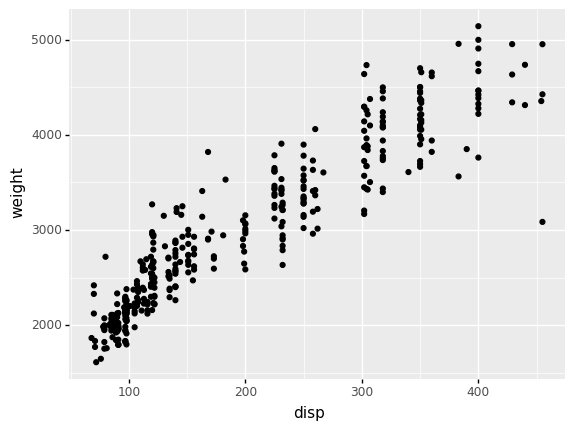

<ggplot: (2995902230691)>

In [7]:
#two major factors affecting mpg is weight of the car and its engine displacement.
#mpg drops because more energy is needed to move more weight and a bigger displacement means more gas used

#I want to attemped to make a 3D graph because I don't think these factors are mutually exclusive
#older cars are heavier due to many things but mostly because they had bigger engines (read: more displacement)

import plotnine as pn
pn.ggplot(df, pn.aes(x='disp', y='weight')) + pn.geom_point()
# here is the relationship between weight and displacement

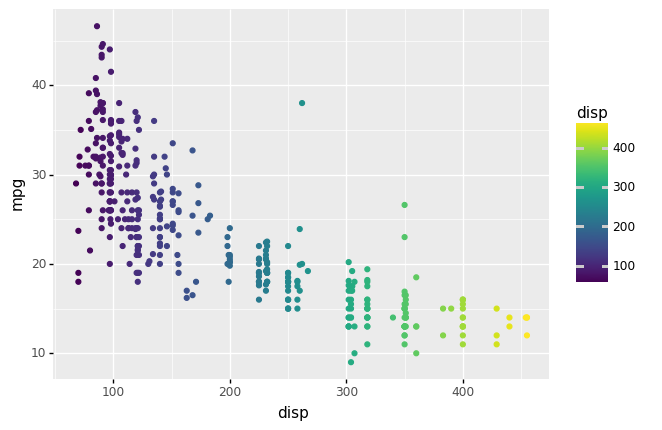

<ggplot: (2995902245307)>

In [8]:
pn.ggplot(df, pn.aes(x='disp', y='mpg', color='disp')) + pn.geom_point()
#relationship between displacement and miles per gallon

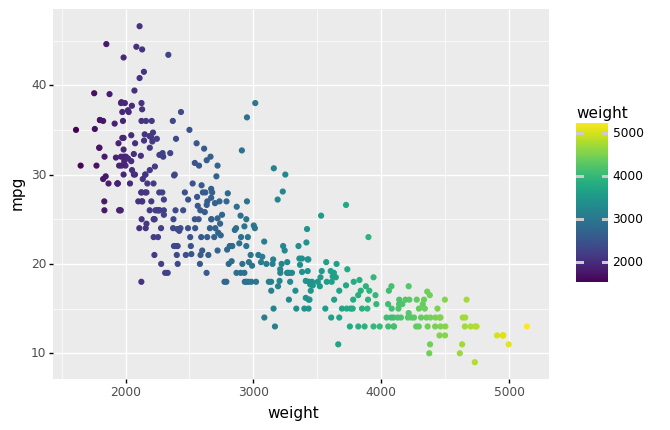

<ggplot: (2995902242832)>

In [9]:
pn.ggplot(df, pn.aes(x='weight', y='mpg', color='weight')) + pn.geom_point()
#relationship between weight and mpg

In [10]:
from mpl_toolkits import mplot3d

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

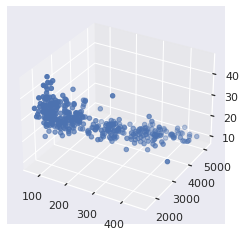

In [30]:
#set up for 3D graph
fig = plt.figure().gca(projection='3d')

#relationship between weight, displacement, and mpg
fig.scatter(df.disp, df.weight, df.mpg,)

x = df['disp']
y = df['weight']
z = df['mpg']

ax.set_xlabel('disp')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')

ax.scatter(x, y, z)

plt.show()

#how do i show a color gradient for 3D cause I cant see very well
#sagemath with Brian Stucky

# x = df[['disp', 'weight']]
# y = df.mpg

# model = LinearRegression(fit_intercept=True)

# model.fit(x, y)
# print('R^2:', model.score(x, y), 'MSE:', mse(model, x, y))

# print(model.intercept_, model.coef_)

#The Linear Regression plane that would show the relation of weight vs disp
#mpg = 43.8 + -0.0165*disp + -0.00575*weight

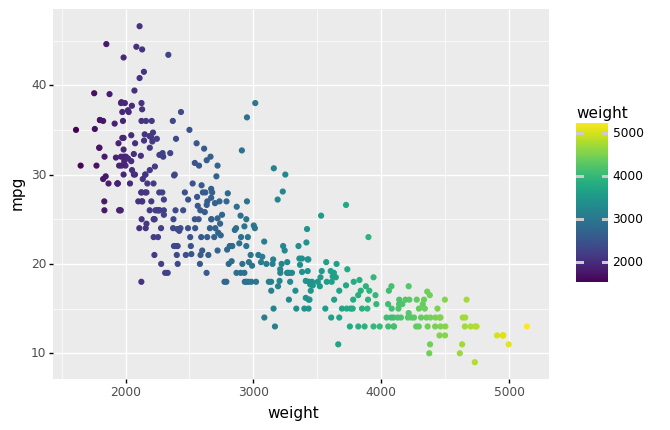

<ggplot: (2995902368621)>

In [23]:
pn.ggplot(df, pn.aes(x='weight', y='mpg', color='weight')) + pn.geom_pon()
#scatterplot of 

In [14]:
from sklearn.linear_model import LinearRegression

#define terms 
x=df[['weight']]
y=df.mpg

model = LinearRegression()
model.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model = LinearRegression().fit(x,y)

In [16]:
#print intercept, coefficient, and R^2 value
print(model.intercept_, model.coef_)
model.score(x, y)

46.21652454901758 [-0.00764734]


0.6926304331206254

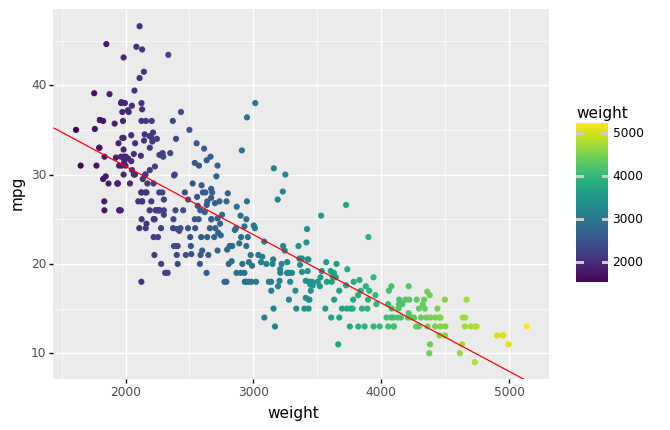

<ggplot: (2995902795608)>

In [17]:
(pn.ggplot(df, pn.aes(x='weight', y='mpg', color="weight")) + pn.geom_point() 
 + pn.geom_abline(intercept=model.intercept_, slope=model.coef_[0], color='red'))

In [18]:
#for multiple linear regression
df['weight_sq'] = df.weight**2

x2 = df[['weight', 'weight_sq']]
x2

,weight,weight_sq
0,3504,12278016
1,3693,13638249
2,3436,11806096
3,3433,11785489
4,3449,11895601
...,...,...
387,2790,7784100
388,2130,4536900
389,2295,5267025
390,2625,6890625


In [19]:
#print intercept, coefficient, and R^2 value

model = LinearRegression().fit(x2, y)
print(model.intercept_, model.coef_)
model.score(x2, y)

62.255473973292126 [-1.84956106e-02  1.69656507e-06]


0.7151475557845139

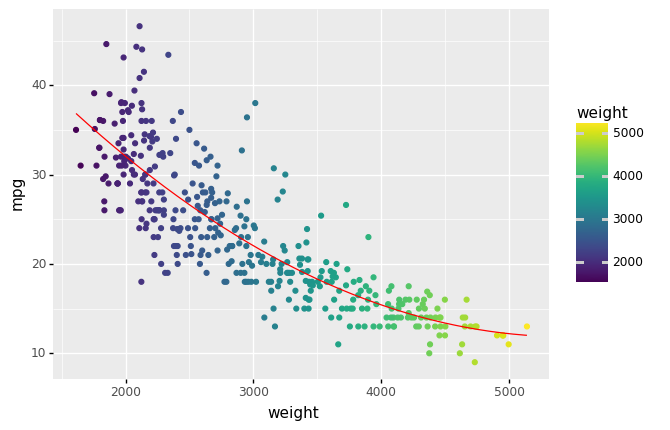

<ggplot: (2995902823617)>

In [20]:
#makeing a new dataframe seems easier to me because I feel like it removes chances of errors

xvals = np.linspace(x2.weight.min(), x2.weight.max(), len(df))
xy_predict = pd.DataFrame({
    'weight': xvals,
    'weight_sq':xvals**2
})

xy_predict['y']=model.predict(xy_predict)

(pn.ggplot(df, pn.aes(x='weight', y='mpg', color='weight')) + pn.geom_point() + 
    pn.geom_line(data=xy_predict, mapping=pn.aes(x='weight', y='y'), color='red')
)